## Unsupervised learning assignment

### Kmeans and Agglomerative clustering comparison

#### Datasets used - USArrest.csv and NCI60_X.csv

#### Prepared by Amritha R J

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
df = pd.read_csv('USArrests.csv', index_col=0)

In [3]:
#Dataframe
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [4]:
#First five rows of the dataframe
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
#Last five rows of the dataframe
df.tail()

,Murder,Assault,UrbanPop,Rape
Virginia,8.5,156,63,20.7
Washington,4.0,145,73,26.2
West Virginia,5.7,81,39,9.3
Wisconsin,2.6,53,66,10.8
Wyoming,6.8,161,60,15.6


In [6]:
#No. of rows and columns in the dataframe
df.shape

(50, 4)

In [7]:
#List of all columns present in the dataframe
df.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [9]:
#Summary
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
#Checking for null values
df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
#Checking for duplicate values
df.duplicated().sum()

0

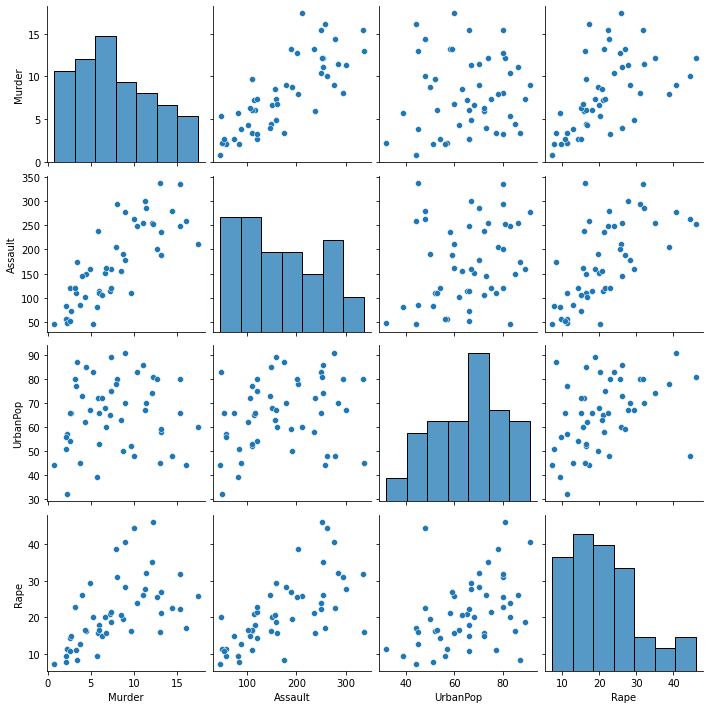

In [12]:
#Pairplot
sns.pairplot(df)
plt.show()

In [13]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df)

### K-Means clustering

In [14]:
#Fitting with kmeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(df1)

In [15]:
k_fit.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 1,
       0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [16]:
k_fit.inertia_

80.18851631161148

In [17]:
#Finding centroids
k_fit.cluster_centers_

array([[-0.46106733, -0.43648445,  0.353123  , -0.30704529],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386],
       [-1.10813868, -1.17527166, -1.10542852, -1.09703714]])

In [18]:
#Finding silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(df1, k_fit.labels_, metric = 'euclidean')

0.31739744174776746

In [19]:
dfn = pd.DataFrame(df1, columns = ['Murder', 'Assault', 'UrbanPop', 'Rape'])
dfn

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


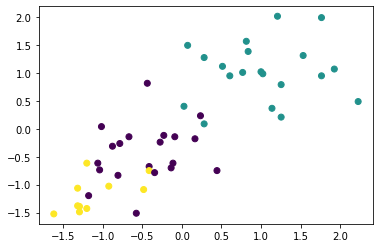

In [20]:
#Scatter plot
plt.scatter(dfn['Murder'], dfn['Assault'], c = k_fit.labels_)
plt.show()

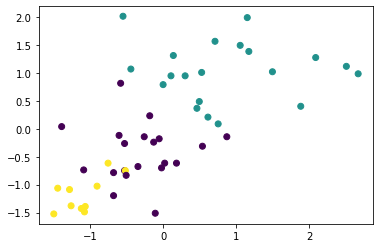

In [21]:
#Scatter plot
plt.scatter(dfn['Rape'], dfn['Assault'], c = k_fit.labels_)
plt.show()

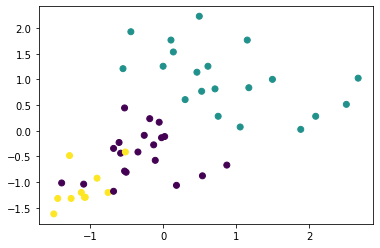

In [22]:
#Scatter plot
plt.scatter(dfn['Rape'], dfn['Murder'], c = k_fit.labels_)
plt.show()

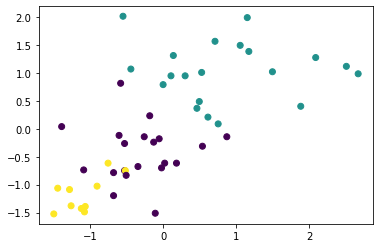

In [23]:
#Scatter plot
plt.scatter(dfn['Rape'], dfn['Assault'], c = k_fit.labels_)
plt.show()

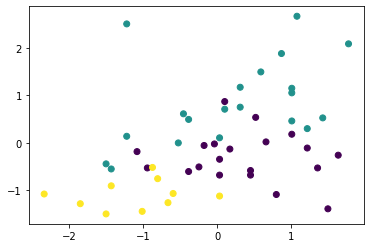

In [24]:
#Scatter plot
plt.scatter(dfn['UrbanPop'], dfn['Rape'], c = k_fit.labels_)
plt.show()

In [25]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [26]:
mergings = linkage(dfn , method = "average")

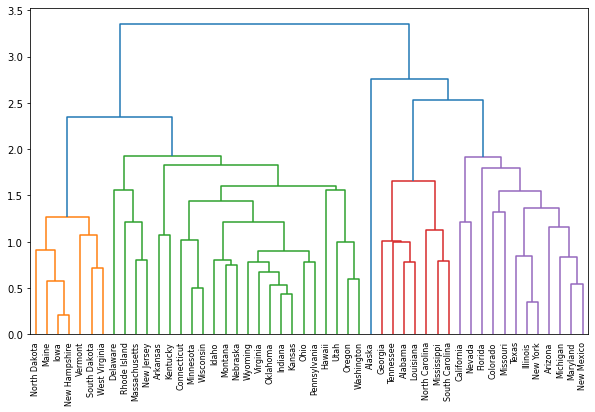

In [27]:
#Dendrogram
plt.figure(figsize=(10,6))
dendrogram(mergings, labels = df.index)
plt.show()

### Agglomerative clustering

In [28]:
df = pd.read_csv('USArrests.csv')
df = df.rename(columns={'Unnamed: 0':'State'})
df

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


<AxesSubplot:xlabel='State'>

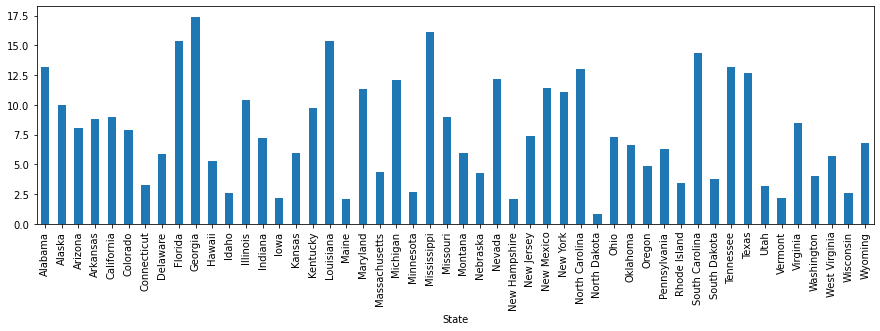

In [29]:
#Bar chart
plt.figure(figsize=(15,4))
df.groupby('State')['Murder'].max().plot(kind='bar')

<AxesSubplot:xlabel='State'>

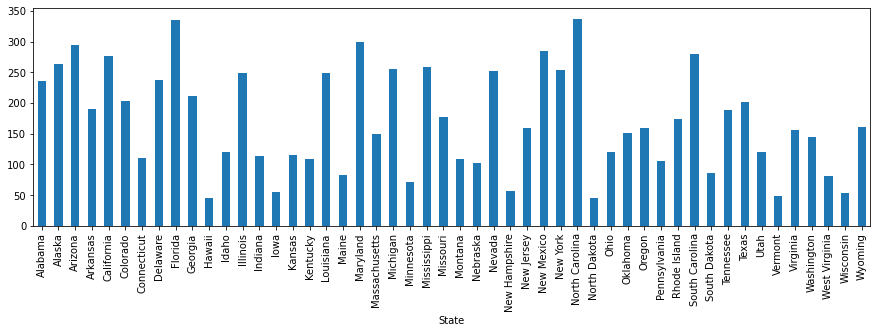

In [30]:
#Bar chart
plt.figure(figsize=(15,4))
df.groupby('State')['Assault'].max().plot(kind='bar')

<AxesSubplot:xlabel='State'>

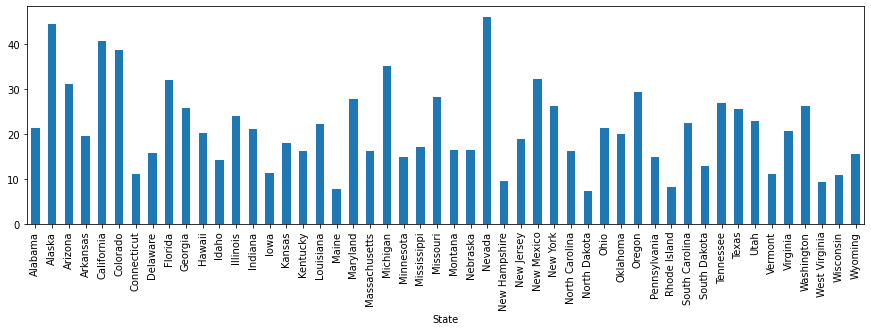

In [31]:
#Bar chart
plt.figure(figsize=(15,4))
df.groupby('State')['Rape'].max().plot(kind='bar')

<AxesSubplot:xlabel='State'>

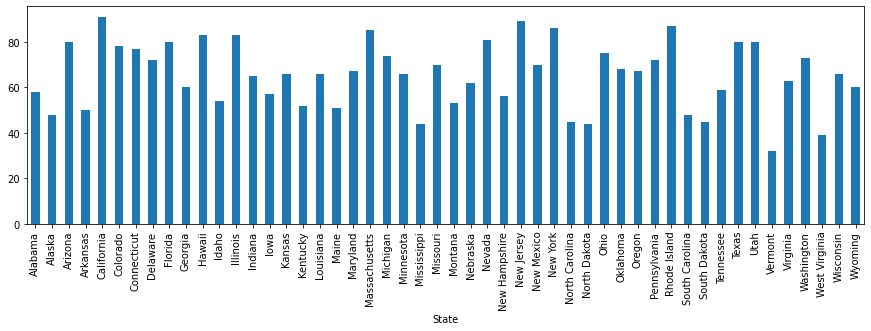

In [32]:
#Bar chart
plt.figure(figsize=(15,4))
df.groupby('State')['UrbanPop'].max().plot(kind='bar')

In [33]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [34]:
dat = df.iloc[:,1:].values

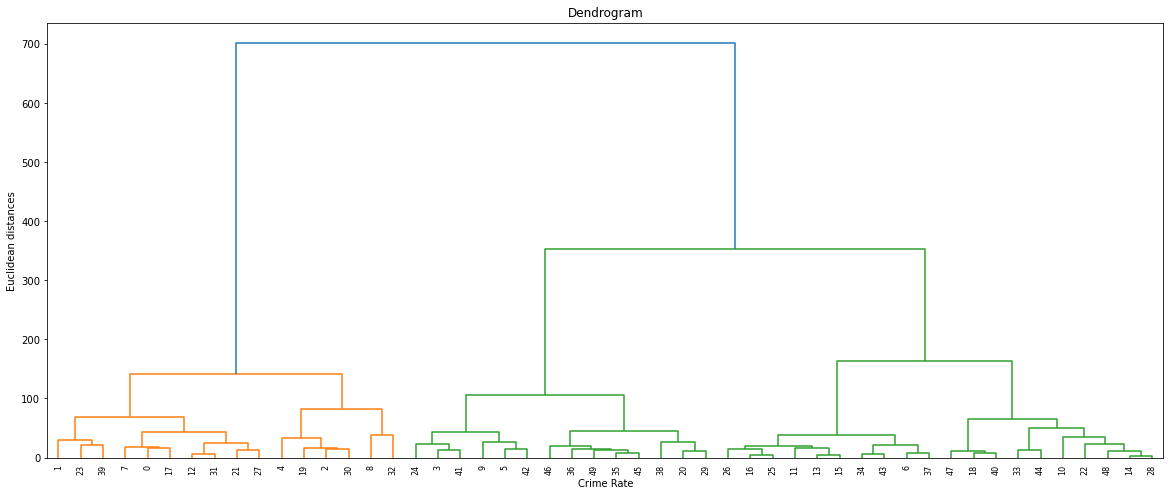

In [35]:
#Dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(dat, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

In [36]:
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean')

In [37]:
#Fitting with agglomerative clustering
agg_fit =AC.fit(df1)
agg_fit.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [38]:
df['cluster labels']= agg_fit.labels_

In [39]:
df[['State','cluster labels']]

,State,cluster labels
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,1
4,California,0
5,Colorado,0
6,Connecticut,1
7,Delaware,1
8,Florida,0
9,Georgia,0


In [40]:
#Finding silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(df1, agg_fit.labels_, metric = 'euclidean')

0.31036358174027895

In [41]:
#Grouping safe states
Safe= df.groupby('cluster labels')['State'].unique()[0]
Safe

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado',
       'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland',
       'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina', 'Tennessee', 'Texas'],
      dtype=object)

In [42]:
#Grouping moderate states
Moderate= df.groupby('cluster labels')['State'].unique()[2]
Moderate

array(['Idaho', 'Iowa', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont',
       'West Virginia', 'Wisconsin'], dtype=object)

In [43]:
#Grouping dangerous states
Danger= df.groupby('cluster labels')['State'].unique()[1]
Danger

array(['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Indiana',
       'Kansas', 'Kentucky', 'Massachusetts', 'Missouri', 'New Jersey',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'Utah', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

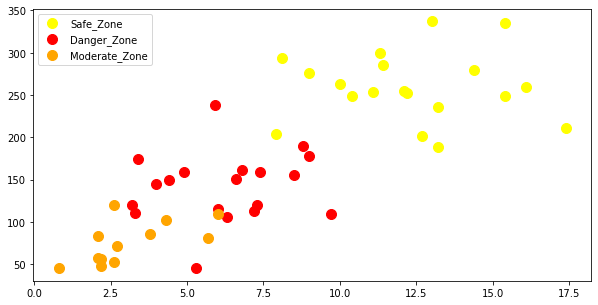

In [44]:
#Scatter plot
plt.figure(figsize=(10,5))
plt.scatter(dat[agg_fit.labels_==0, 0], dat[agg_fit.labels_==0, 1], s=100, c='yellow', label ='Safe_Zone')
plt.scatter(dat[agg_fit.labels_==1, 0], dat[agg_fit.labels_==1, 1], s=100, c='red', label ='Danger_Zone')
plt.scatter(dat[agg_fit.labels_==2, 0], dat[agg_fit.labels_==2, 1], s=100, c='orange', label ='Moderate_Zone')
plt.legend()
plt.show()

In [45]:
#Importing PCA
from sklearn.decomposition import PCA

In [46]:
pca = PCA()

In [47]:
#Fitting with PCA
pc_arr = pca.fit_transform(df1)

In [48]:
pc_data = pd.DataFrame(pc_arr, columns = ['Murder', 'Assault', 'UrbanPop', 'Rape'])

In [49]:
pc_data.corr().round()

,Murder,Assault,UrbanPop,Rape
Murder,1.0,0.0,-0.0,0.0
Assault,0.0,1.0,0.0,-0.0
UrbanPop,-0.0,0.0,1.0,-0.0
Rape,0.0,-0.0,-0.0,1.0


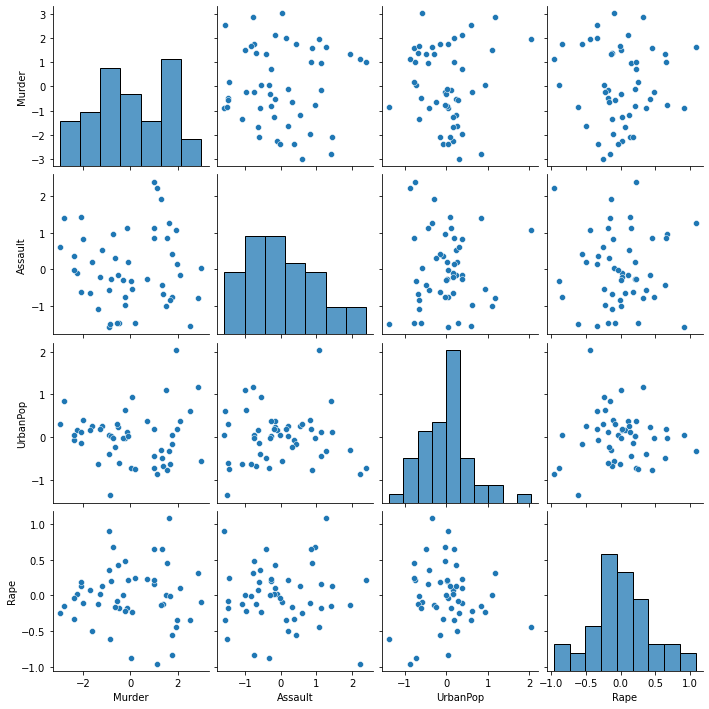

In [50]:
#Pairplot
sns.pairplot(pc_data)

In [51]:
pc_data

,Murder,Assault,UrbanPop,Rape
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996
5,1.514563,-0.987555,1.095007,0.001465
6,-1.358647,-1.088928,-0.643258,-0.118469
7,0.047709,-0.325359,-0.718633,-0.881978
8,3.013042,0.039229,-0.576829,-0.096285
9,1.639283,1.278942,-0.342460,1.076797


In [52]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_) 

[2.53085875 1.00996444 0.36383998 0.17696948]
[0.62006039 0.24744129 0.0891408  0.04335752]


Redoing kmeans and agglomerative clustering

In [53]:
#Fitting
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
k_fit1 = kmeans.fit(pc_data)

In [54]:
k_fi = kmeans.fit(pc_arr)

In [55]:
k_fit1.cluster_centers_

array([[-4.72161391e-01, -7.42871218e-01, -1.63686847e-01,
         2.06763805e-02],
       [ 1.66172672e+00,  2.99674335e-01,  3.19847867e-03,
         6.03095396e-04],
       [-1.83428230e+00,  4.20889485e-01,  1.82501427e-01,
        -2.44917140e-02]])

In [56]:
k_fit1.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0])

In [57]:
k_fit1.inertia_

80.08569526137279

In [58]:
k_fit1.cluster_centers_

array([[-4.72161391e-01, -7.42871218e-01, -1.63686847e-01,
         2.06763805e-02],
       [ 1.66172672e+00,  2.99674335e-01,  3.19847867e-03,
         6.03095396e-04],
       [-1.83428230e+00,  4.20889485e-01,  1.82501427e-01,
        -2.44917140e-02]])

In [59]:
#Fitting
agg_fit1 =AC.fit(pc_data)
agg_fit1.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 2, 1], dtype=int64)

In [60]:
#Silhouette score
silhouette_score(pc_data, k_fit1.labels_, metric = 'euclidean')

0.3081362264894563

In [61]:
#Silhouette score
silhouette_score(pc_data, agg_fit1.labels_, metric = 'euclidean')

0.31036358174027906

Introducing new dataset

Dataset - NCI60_X.csv

In [62]:
#Reading dataset
new_df = pd.read_csv('NCI60_X.csv',index_col=0)

In [63]:
#Dataframe
new_df

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,-0.400019,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000
V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,-0.560020,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000
V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.160020,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000
V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,0.889980,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000


In [64]:
#First five rows of the dataframe
new_df.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [65]:
#Last five rows of the dataframe
new_df.tail()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V60,-0.03,-0.48,0.07,-0.70,-0.195,4.100000e-01,-0.24,0.105,-0.41,0.875019,...,-0.400019,0.15,-0.43,0.145,-0.090020,-0.02,-1.39001,-1.15,0.29,1.19
V61,-0.27,0.63,-0.10,1.10,1.045,8.000000e-02,-0.09,-0.675,-0.31,0.275019,...,-0.560020,0.20,0.29,-0.035,0.279981,-0.16,-0.02001,-0.64,-0.37,-0.43
V62,0.21,-0.62,-0.15,-1.33,0.045,-4.000000e-01,-0.39,-0.675,-0.36,0.945020,...,-0.160020,-0.12,0.85,-0.125,0.779980,0.39,0.00000,0.16,2.03,3.94
V63,-0.05,0.14,-0.09,-1.26,0.045,-2.710505e-20,0.42,-0.305,0.31,0.065019,...,0.889980,-0.42,-0.46,-0.855,-0.160020,-0.35,-0.36001,-0.49,0.01,-1.72
V64,0.35,-0.27,0.02,-1.23,-0.715,-3.400000e-01,-0.52,0.475,0.23,0.915019,...,1.629980,3.00,2.86,2.145,0.869981,0.48,0.96999,0.29,-0.15,1.21


In [66]:
#No. of rows and columns in the dataframe
new_df.shape

(64, 6830)

In [67]:
#List of all columns present in the dataframe
new_df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '6821', '6822', '6823', '6824', '6825', '6826', '6827', '6828', '6829',
       '6830'],
      dtype='object', length=6830)

In [68]:
#Summary
new_df.describe()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,-0.019063,-0.027813,-0.019923,-0.328673,0.026093,0.006718,0.019687,-0.023126,0.000780,0.019237,...,-0.079551,0.402577,0.295077,0.171093,0.101152,0.153671,0.090775,-0.126798,0.129921,0.143514
std,0.441332,0.757433,0.433306,1.091905,0.485073,0.350432,0.370683,0.338629,0.429188,0.641583,...,0.890365,1.131769,1.121419,0.888764,0.641122,0.924292,1.209138,0.787136,0.566303,1.509312
min,-1.060000,-2.190000,-1.710000,-2.610000,-0.825000,-0.700000,-0.920000,-0.705000,-0.900000,-1.654981,...,-1.850020,-0.775000,-1.150000,-2.095000,-1.390020,-1.330000,-2.030010,-1.700000,-0.910000,-2.830000
25%,-0.372500,-0.404985,-0.192485,-1.322500,-0.225000,-0.156250,-0.246250,-0.204985,-0.360000,-0.477466,...,-0.660019,-0.177500,-0.327500,-0.328750,-0.232519,-0.330000,-0.602510,-0.682500,-0.275000,-1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.310005,0.352500,0.162490,0.692500,0.210000,0.184995,0.247505,0.160015,0.295000,0.467519,...,0.304980,0.560000,0.422500,0.427500,0.302480,0.325000,0.134995,0.302505,0.451255,1.250000
max,0.940000,2.240000,1.150000,1.500000,1.715000,1.160000,0.940000,0.724961,0.990000,1.490019,...,2.929980,5.200000,5.510000,3.995000,2.899980,4.600000,5.339990,2.560000,2.030000,3.940000


In [69]:
#Checking for null values
s = new_df.isna().sum()
s

1       0
2       0
3       0
4       0
5       0
       ..
6826    0
6827    0
6828    0
6829    0
6830    0
Length: 6830, dtype: int64

In [70]:
#Chceking if the sum of null values is only 0
s.nunique()

1

In [71]:
#Checking for duplicate values
new_df.duplicated().sum()

0

In [72]:
#Standardization
new_df1 = scaler.fit_transform(new_df)

In [73]:
#Fitting with kmeans
kmeans = KMeans(n_clusters=3)
k_fit1 = kmeans.fit(new_df1)

In [74]:
#Finding silhouette score
from sklearn.metrics import silhouette_score
km_score = silhouette_score(new_df1, k_fit1.labels_, metric = 'euclidean')
km_score

0.07789259232602455

In [75]:
#Fitting with agglomerative clustering
agg_fit =AC.fit(new_df1)

In [76]:
#Finding silhouette score
ag_score = silhouette_score(new_df1, agg_fit.labels_, metric = 'euclidean')
ag_score

0.07316382376075524

In [77]:
#Reducing features to 25 principal components
pca = PCA(n_components=25)
n_pca = pca.fit_transform(new_df1)

In [78]:
#New dataframe
pca_df = pd.DataFrame(n_pca)
pca_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-19.838026,-3.555374,-9.815771,-0.823036,12.592477,7.484351,14.203331,-3.179053,21.836806,-20.488247,...,5.062778,-20.425550,10.246321,-4.008449,5.712331,-7.584957,-10.096516,-6.966028,19.512942,-5.764367
1,-23.089270,-6.441177,-13.482247,5.626588,8.039765,3.734517,10.149191,-7.175613,22.207359,-13.278949,...,-7.087823,-18.317073,7.264904,-3.425272,17.359540,2.649846,-10.407965,1.668138,13.083329,0.381554
2,-27.456181,-2.465123,-3.537128,-1.350963,12.548820,17.338816,10.368454,-2.642252,-0.404362,-6.520860,...,6.892843,-12.876887,-0.702691,4.429586,4.553582,-1.940808,6.800282,8.889588,1.354970,11.658261
3,-42.816810,9.769437,-0.886842,3.455773,42.279717,27.285217,17.590895,-0.557250,14.315600,16.537469,...,21.351475,1.552666,2.007704,-2.203096,-0.400089,5.004751,-15.994550,-9.995703,-19.891515,7.982875
4,-55.418480,5.199893,-21.103124,15.846962,10.445877,13.034647,12.570112,32.610873,-7.950005,-10.011616,...,3.879431,22.440257,-17.639594,-0.487369,2.454223,3.456942,9.730511,-5.284029,3.053996,17.727577
5,-27.178062,-6.781416,-21.813561,13.832186,-8.009195,0.665939,27.960668,31.353678,-11.016911,1.647732,...,18.293754,2.116944,5.537926,3.951890,-27.180985,-8.042043,-13.420455,5.154874,-16.856183,-21.597205
6,-31.446011,-3.862805,-30.340172,41.680872,-10.432076,-17.023496,23.797313,-1.126390,14.018195,-8.067142,...,-12.693075,16.314066,-3.071695,-14.560094,11.920489,-7.748144,2.548871,-11.250671,0.824593,-9.691391
7,-22.332279,-10.396817,-18.760598,6.948143,5.577505,11.753456,11.689514,22.847291,-3.267947,-4.753779,...,-9.631788,-16.534079,-8.234689,-0.650113,-9.083136,28.525079,5.311759,-6.125513,-4.608543,6.675500
8,-14.290125,-16.113135,-19.766718,6.524025,3.794468,-8.083268,-13.155270,7.262944,0.779913,-8.376990,...,4.537598,0.618338,-5.468258,0.045368,-4.097297,-11.172692,16.608165,1.635742,11.913513,5.340485
9,-29.748053,-23.994028,-5.883911,-10.021061,-3.475962,11.668098,0.534457,7.936809,-20.040800,-28.248701,...,-11.505563,6.253909,35.065861,24.844565,7.378626,17.953811,24.937663,4.676727,-6.863785,-9.718284


In [79]:
#Fitting with kmeans
k_fit_pca = kmeans.fit(pca_df)

In [80]:
#Fitting with agglomerative clustering
agg_fit_pca =AC.fit(pca_df)

In [81]:
#Finding silhouette score
kmc_score_pca = silhouette_score(n_pca, k_fit_pca.labels_, metric = 'euclidean')
kmc_score_pca

0.15940217850666225

In [82]:
#Finding silhouette score
agg_score_pca = silhouette_score(n_pca, agg_fit_pca.labels_, metric = 'euclidean')
agg_score_pca

0.12144092951789356

In [83]:
#Comparison
comparison = (('Raw data', km_score, ag_score),('Feature reduced data', kmc_score_pca, agg_score_pca))
comparison_df = pd.DataFrame(comparison, columns = ["Dataset", "KMeans", "Agglomerative"])
comparison_df.set_index('Dataset', inplace=True)
comparison_df

,KMeans,Agglomerative
Dataset,,
Raw data,0.077893,0.073164
Feature reduced data,0.159402,0.121441
